In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of our graph
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree
import graphviz
from sklearn.preprocessing import OneHotEncoder

In [5]:
df = pd.read_csv(r'C:\Users\PRM\Documents\Projects\Python\HeartDisease\heart_2020_cleaned.csv')

In [6]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [7]:
df1 = df.copy()

# Exploratory Data Analysis

In [8]:
df.shape

(319795, 18)

In [9]:
df.isnull().sum().sort_values(ascending = False)

HeartDisease        0
BMI                 0
KidneyDisease       0
Asthma              0
SleepTime           0
GenHealth           0
PhysicalActivity    0
Diabetic            0
Race                0
AgeCategory         0
Sex                 0
DiffWalking         0
MentalHealth        0
PhysicalHealth      0
Stroke              0
AlcoholDrinking     0
Smoking             0
SkinCancer          0
dtype: int64

In [10]:
sns.set(rc={"figure.figsize":(12, 7)})

<AxesSubplot:xlabel='Race', ylabel='count'>

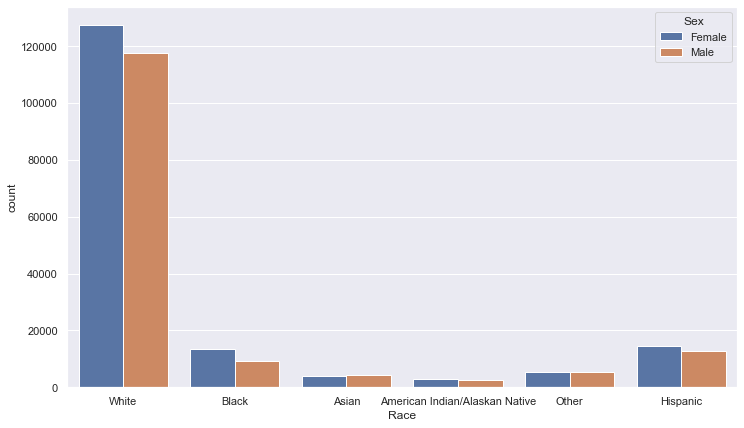

In [11]:
sns.countplot(data=df,x='Race',hue='Sex')

<AxesSubplot:xlabel='Smoking', ylabel='BMI'>

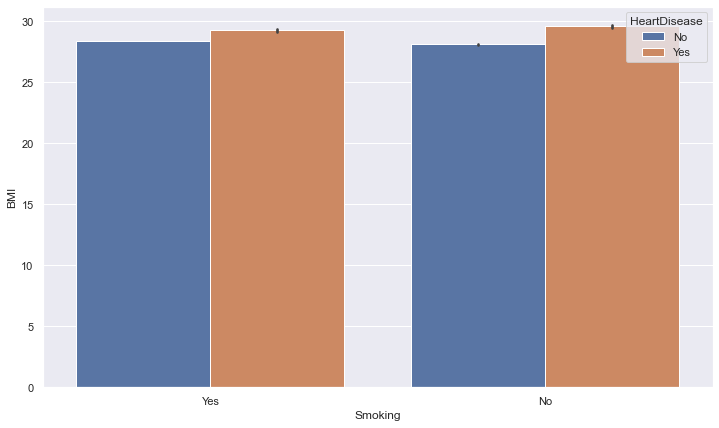

In [12]:
sns.barplot(data=df,hue='HeartDisease',x='Smoking',y='BMI')

<AxesSubplot:>

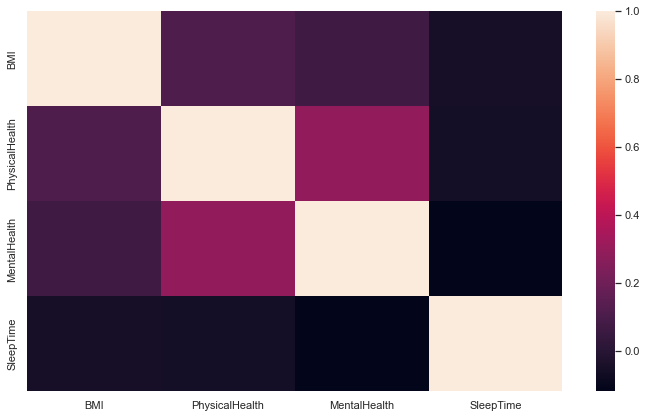

In [13]:
sns.heatmap(df.corr())

In [14]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

<AxesSubplot:xlabel='Sex', ylabel='count'>

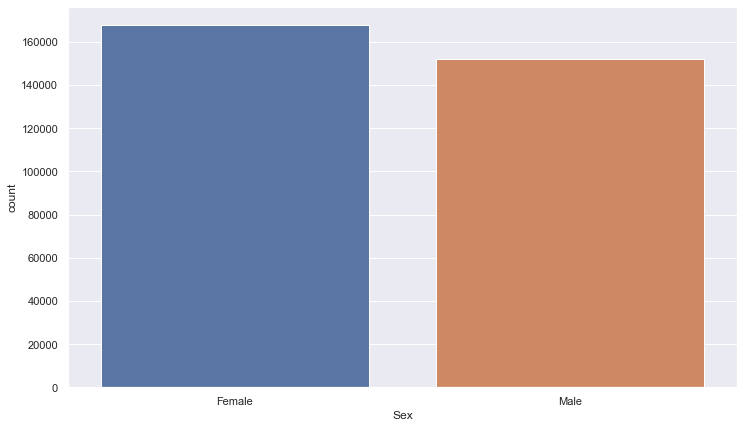

In [15]:
sns.countplot(data=df,x='Sex')

# Pre-processing

In [16]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [17]:
df1['AlcoholDrinking'] = LabelEncoder().fit_transform(df1['AlcoholDrinking'])
df1['Stroke'] = LabelEncoder().fit_transform(df1['Stroke'])
df1['HeartDisease'] = LabelEncoder().fit_transform(df1['HeartDisease'])
df1['DiffWalking'] = LabelEncoder().fit_transform(df1['DiffWalking'])
df1['Diabetic'] = LabelEncoder().fit_transform(df1['Diabetic'])
df1['PhysicalActivity'] = LabelEncoder().fit_transform(df1['PhysicalActivity'])
df1['Asthma'] = LabelEncoder().fit_transform(df1['Asthma'])
df1['KidneyDisease'] = LabelEncoder().fit_transform(df1['KidneyDisease'])
df1['SkinCancer'] = LabelEncoder().fit_transform(df1['SkinCancer'])
df1['Smoking'] = LabelEncoder().fit_transform(df1['Smoking'])
df1['Sex'] = LabelEncoder().fit_transform(df1['Sex'])

In [18]:
  scale_mapper = {'18-24':1,"25-29":2, "30-34":3, "35-39":4,"40-44":5,'45-49':6,'50-54':7
  ,'55-59':8,'60-64':9,'65-69':10,'70-74':11,'75-79':12,'80 or older':13}
  df1["AgeCategory"] = df1["AgeCategory"].replace(scale_mapper)

In [19]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df1[['Race']])
df1[ohe.categories_[0]] = transformed.toarray()

In [20]:
  scale_mapper = {"Poor":1, "Fair":2, "Good":3,"Very good":4,'Excellent':5}
  df1["GenHealth"] = df1["GenHealth"].replace(scale_mapper)

In [21]:
df1 = df1.drop(columns=['Race'])

In [22]:
feature_cols = df1.columns[1:]
X = df1[feature_cols] # Features
y = df1[['HeartDisease']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Decision Tree

In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9151231511689719


In [26]:
target = list(df['HeartDisease'].unique())
feature_names = list(X.columns)

In [28]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

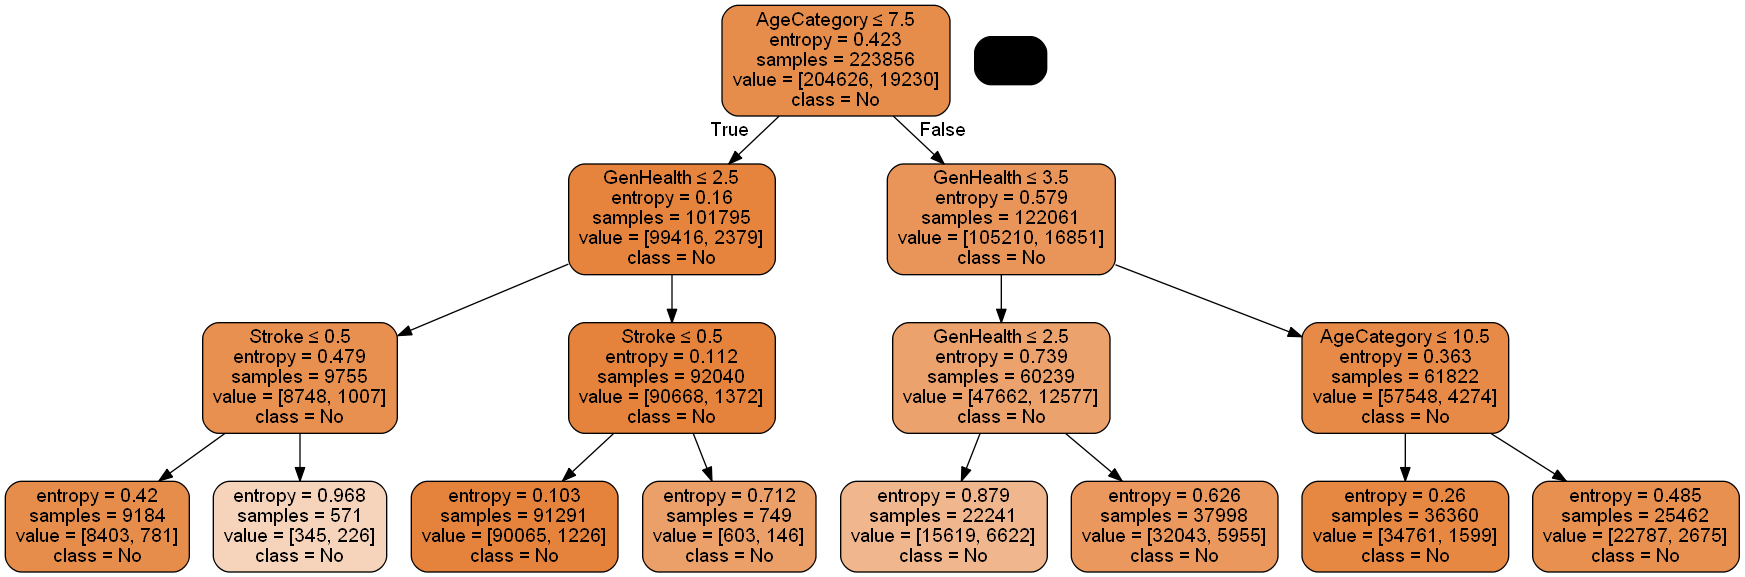

In [29]:
dot_data = tree.export_graphviz(clf,
                                out_file=None, 
                      feature_names=X.columns,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  

#graph = graphviz.Source(dot_data)

graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [30]:
graph.write_png("tree.png")

True